# **The Sparks Foundation**

## Ayush Kumar
### (Data Science & Business Analytics Intern)

### **GRIP Task #1 - Prediction using Supervised ML**
Predict the percentage of a student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.
Data can be found at http://bit.ly/w-data.
What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import warnings
warnings.simplefilter('ignore')

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the dataset

In [3]:
dataset = pd.read_csv('Task-1 data.csv')

In [4]:
df = dataset.copy()
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df['Hours'].corr(df['Scores'])

0.9761906560220885

We can clearly see that the two columns are highly correlated.

Let's plot the data points on 2-D graph -

**Regression plot**

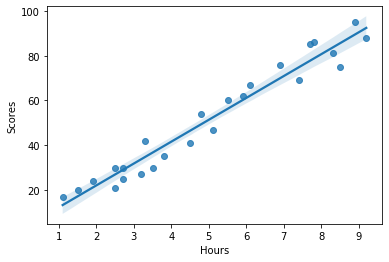

In [8]:
sns.regplot(x='Hours', y='Scores', data=df)

This graph shows that there's a positive linear relationship between the dependent & independent variables.

Let's plot the residual values for this dataset -

**Residual plot**

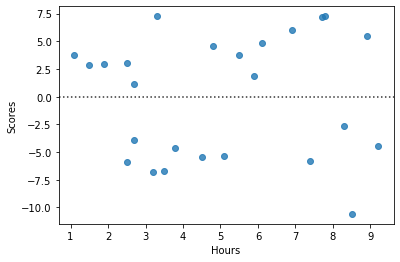

In [9]:
sns.residplot(x='Hours', y='Scores', data=df)

As we can see that the points in this plot are randomly dispersed around the horizontal axis.
Therefore, a linear regression model will be appropriate for this data.

## Splitting the dataset

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

**Performing train-test split -**

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

## Simple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lr.coef_

array([9.77580339])

In [14]:
lr.intercept_

2.48367340537321

In [15]:
y_pred = lr.predict(X_test)

**Evaluating the performance of our model -**

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: {}".format(r2_score(y_test, y_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9418866898421842
Mean Squared Error: 18.68639418054177


**Predicting score of a student who studies 9.25 hrs/day -**

In [17]:
Hours = np.array(9.25).reshape(1, -1)
Score = lr.predict(Hours)
print("No. of Study Hours = {}".format(Hours[0][0]))
print("Predicted Score = {}".format(Score[0]))

No. of Study Hours = 9.25
Predicted Score = 92.9098547701573
